In [1]:
from signal_library import *
import heapq
import peakutils # other options: ```from detect_peaks import *``` or ```import pickle```
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile as sf
import scipy

signal = signal_class()
frequency_port_AM = 14000
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 1

In [2]:
received_audio, samplerate = sf.read('audio/modulated_audio.wav')
samples_audio = len(received_audio)
duration = samples_audio/fs
t_domain = np.linspace(0, duration, samples_audio)

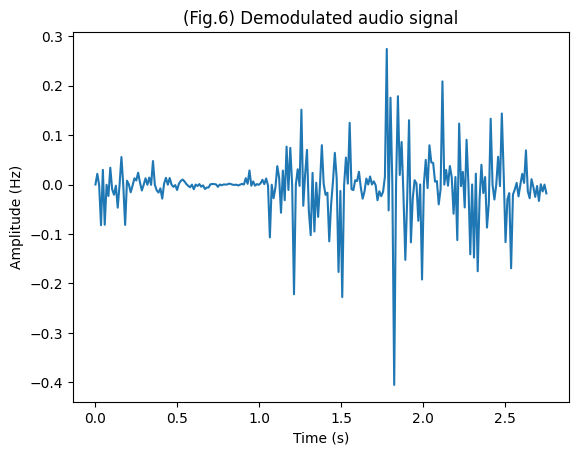

In [3]:
A = 1
sinewave = A*np.sin(2*np.pi*frequency_port_AM*t_domain)
demodulated_audio = received_audio*sinewave

plt.figure()
plt.plot(t_domain[::500], demodulated_audio[::500])
plt.title('(Fig.6) Demodulated audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.show()

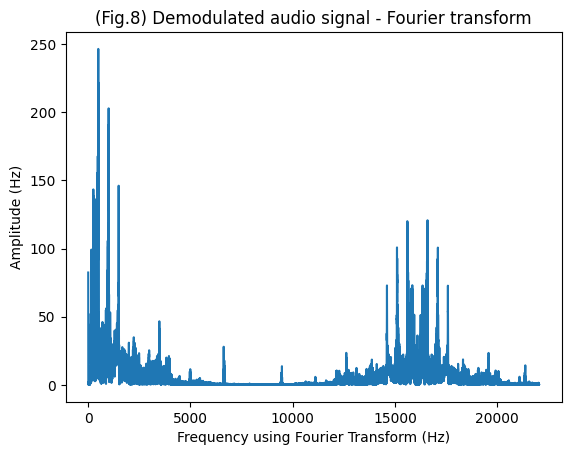

In [4]:
axis_x, axis_y = signal.calcFFT(demodulated_audio, fs)

plt.figure()
plt.plot(axis_x, np.abs(axis_y))
plt.title('(Fig.8) Demodulated audio signal - Fourier transform')
plt.xlabel('Frequency using Fourier Transform (Hz)')
plt.ylabel('Amplitude (Hz)')
plt.show()

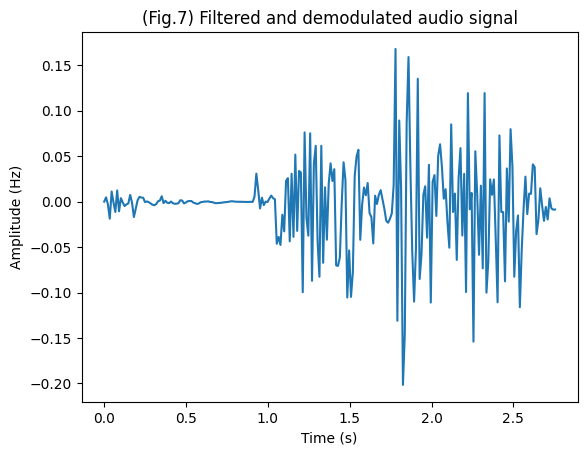

In [5]:
# idea extracted from: https://stackoverflow.com/questions/21862777/bandpass-butterworth-filter-frequencies-in-scipy
b, a = scipy.signal.butter(4, 2200, 'lowpass', fs=samplerate)
filtered_audio = scipy.signal.filtfilt(b, a, demodulated_audio)
plt.figure()
plt.plot(t_domain[::500], filtered_audio[::500])
plt.title('(Fig.7) Filtered and demodulated audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.show()

In [6]:
print('Playing filtered and demodulated audio...')
sd.play(filtered_audio, fs)
print('...End of audio')
sd.wait()

path = 'audio/demodulated_audio.wav'
sf.write(path, filtered_audio, fs)
print(f'Audio saved in: {path}')

Playing filtered and demodulated audio...
...End of audio
Audio saved in: audio/demodulated_audio.wav
